In [1]:
#importing the nesseary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset
df=pd.read_excel("D:/GITHUB/car_data1.xlsx")

In [3]:
df

,Unnamed: 0,buying,maint,doors,persons,lug_boot,safety,class
0,0,vhigh,vhigh,2,2,small,low,unacc
1,1,vhigh,vhigh,2,2,small,med,unacc
2,2,vhigh,vhigh,2,2,small,high,unacc
3,3,vhigh,vhigh,2,2,med,low,unacc
4,4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...,...
1723,1723,low,low,5more,more,med,med,good
1724,1724,low,low,5more,more,med,high,vgood
1725,1725,low,low,5more,more,big,low,unacc
1726,1726,low,low,5more,more,big,med,good


In [4]:
#checking  the columns
df.columns

Index(['Unnamed: 0', 'buying', 'maint', 'doors', 'persons', 'lug_boot',
       'safety', 'class'],
      dtype='object')

In [5]:
#Dropping the useless columns
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df.shape

(1728, 7)

In [7]:
df.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

In [8]:
d=df.columns
for i in d:
    print(df[i].value_counts())
    print("♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣")

high     432
low      432
vhigh    432
med      432
Name: buying, dtype: int64
♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣
high     432
low      432
vhigh    432
med      432
Name: maint, dtype: int64
♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣
4        432
2        432
5more    432
3        432
Name: doors, dtype: int64
♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣
4       576
2       576
more    576
Name: persons, dtype: int64
♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣
med      576
small    576
big      576
Name: lug_boot, dtype: int64
♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣
high    576
low     576
med     576
Name: safety, dtype: int64
♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64
♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣


In [11]:
df['class']=df['class'].replace({"unacc":0,"acc":0,"good":1,"vgood":1})

In [12]:
df['class'].value_counts()

0    1594
1     134
Name: class, dtype: int64

# Uni variate analysis

In [13]:
df.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class        int64
dtype: object

# buying

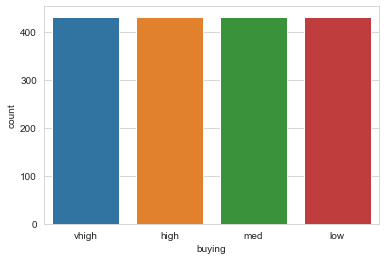

In [14]:
sns.set_style("whitegrid")
sns.countplot(x="buying",data=df)

# maint

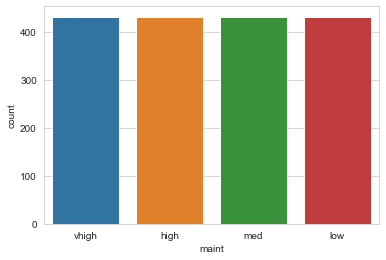

In [15]:
sns.countplot(x="maint",data=df)

# doors

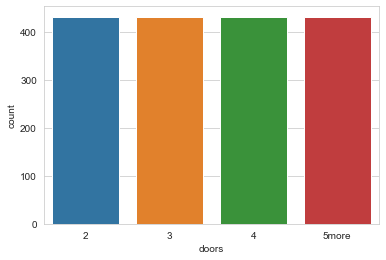

In [16]:
sns.countplot(x="doors",data=df)

# persons

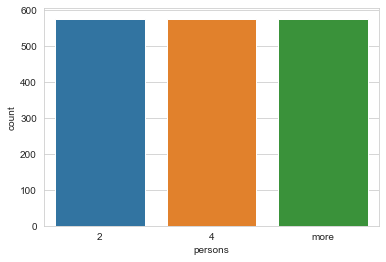

In [17]:
sns.countplot(x="persons",data=df)

# lug_boot

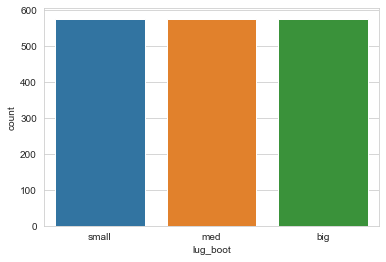

In [18]:
sns.countplot(x="lug_boot",data=df)

# safety

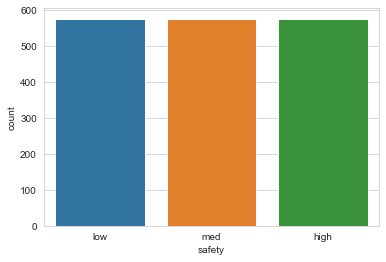

In [19]:
sns.countplot(x="safety",data=df)

# class

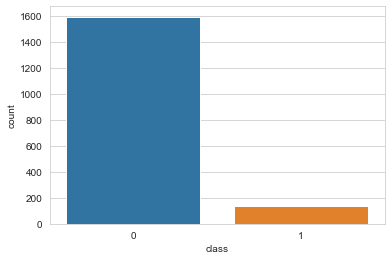

In [20]:
sns.countplot(x="class",data=df)

# Baivariet Analysis

# buying vs class

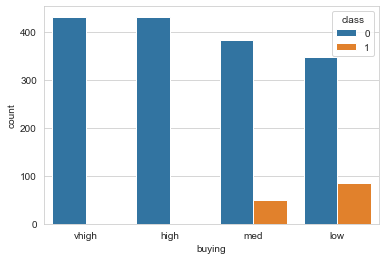

In [21]:
sns.countplot(x="buying",hue="class",data=df)

# maint vs class

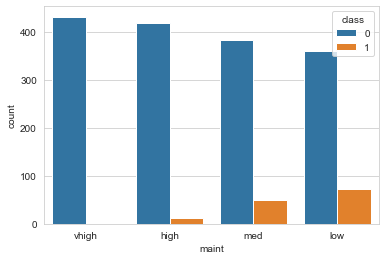

In [22]:
sns.countplot(x="maint",hue="class",data=df)

# doors vs class

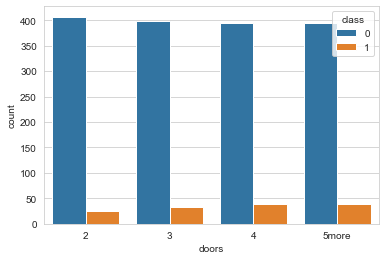

In [23]:
sns.countplot(x="doors",hue="class",data=df)

# persons vs class

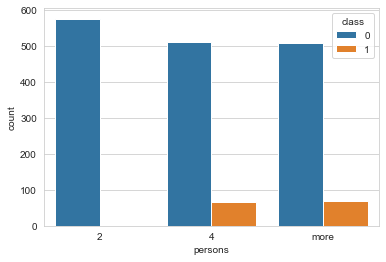

In [24]:
sns.countplot(x="persons",hue="class",data=df)

# lug_boot vs class

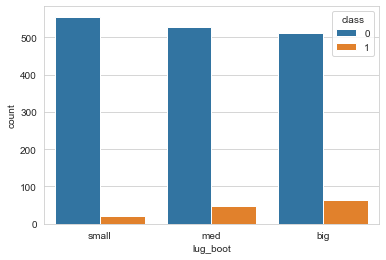

In [25]:
sns.countplot(x="lug_boot",hue="class",data=df)

# safety vs class

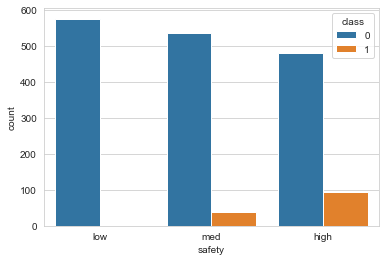

In [26]:
sns.countplot(x="safety",hue="class",data=df)

In [27]:
from sklearn.preprocessing import LabelEncoder
o=LabelEncoder()
d=df.columns
for i in d:
    df[i]=o.fit_transform(df[i])
df.dtypes


buying      int32
maint       int32
doors       int32
persons     int32
lug_boot    int32
safety      int32
class       int64
dtype: object

In [28]:
#spliting into input and output variable
df_x=df.drop(columns=['class'],axis=1)
y=df[['class']]

In [29]:
#scalling the data with standard scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [42]:
#In this data set we know that out target variable class is catagorical so we are going to take Logistic regresson
#lets make a function for getting the best random_satae for a model toget better accuracy score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
def max_acc(rgr,x,y):
    max_acc=0
    for r in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r,test_size=0.20)
        rgr.fit(x_train,y_train)
        y_prd=rgr.predict(x_test)
        rc=accuracy_score(y_test,y_prd)
        if rc>max_acc:
            max_acc=rc
            final_r=r
    print("max accuracy_ score coressponding to ♣♣→",final_r,"is♣♣",max_acc*100)

In [43]:
#lets start with logistic regression
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
max_acc(lg,x,y)

max accuracy_ score coressponding to ♣♣→ 94 is♣♣ 96.24277456647398


In [32]:
#lets make a function for cross_val_score
from sklearn.model_selection import cross_val_score   
def k(model,x,y):
    c=cross_val_score(model,x,y,cv=5,scoring="accuracy")
    print("mean accuracy score for ",model,c.mean())
    print("Standard deviation  in accuracy score for ",model,c.std())
    print()
    print("******************************************************")
    print("After seen the cross validation score of",model,"the accuracy score mean is",c.mean())

In [33]:
k(lg,x,y)

mean accuracy score for  LogisticRegression() 0.9178286001507917
Standard deviation  in accuracy score for  LogisticRegression() 0.003827508238682917

******************************************************
After seen the cross validation score of LogisticRegression() the accuracy score mean is 0.9178286001507917


In [34]:
def PLT(md,x,y,rd):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=rd,test_size=0.20)
    md.fit(x_train,y_train)
    pre=md.predict(x_test)
    acc=accuracy_score(y_test,pre)
    print(acc*100)
    cm=confusion_matrix(y_test,pre)
    print()
    print()
    sns.heatmap(cm,annot=True)
    plt.show()
    cr=classification_report(y_test,pre)
    print()
    print()
    print()
    print(cr,"\n","☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼")

93.9306358381503




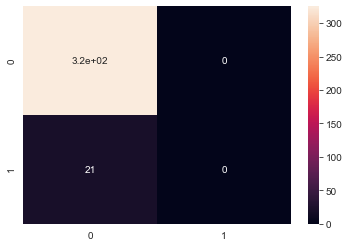




              precision    recall  f1-score   support

           0       0.94      1.00      0.97       325
           1       0.00      0.00      0.00        21

    accuracy                           0.94       346
   macro avg       0.47      0.50      0.48       346
weighted avg       0.88      0.94      0.91       346
 
 ☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼


In [35]:
PLT(lg,x,y,67)

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [37]:
#lets go with support vector classifier
from sklearn.model_selection import *
svc=SVC()
parameters={"kernel":["poly","rbf","linear"],"C":[0.0001,0.001,0.01,0.1,1]}
Gs=GridSearchCV(svc,parameters,cv=5,scoring="accuracy")
Gs.fit(x,y)
Gs.best_params_#finding the best parameters with Gridsearchcv

{'C': 1, 'kernel': 'rbf'}

In [44]:
svc=SVC(C=1,kernel='rbf')
max_acc(svc,x,y)

max accuracy_ score coressponding to ♣♣→ 65 is♣♣ 97.97687861271676


In [39]:
k(svc,x,y)

mean accuracy score for  SVC(C=1) 0.9357594035352268
Standard deviation  in accuracy score for  SVC(C=1) 0.03179122412135081

******************************************************
After seen the cross validation score of SVC(C=1) the accuracy score mean is 0.9357594035352268


97.97687861271676




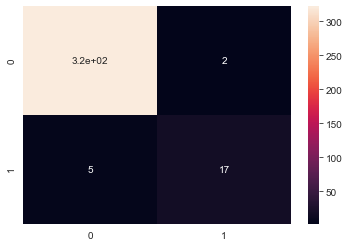




              precision    recall  f1-score   support

           0       0.98      0.99      0.99       324
           1       0.89      0.77      0.83        22

    accuracy                           0.98       346
   macro avg       0.94      0.88      0.91       346
weighted avg       0.98      0.98      0.98       346
 
 ☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼


In [41]:
PLT(svc,x,y,65)

In [46]:
kn=KNeighborsClassifier()
parameters={"n_neighbors":range(1,59,2)}
gk=GridSearchCV(kn,parameters,cv=5,scoring="accuracy")
gk.fit(x,y)
gk.best_params_

{'n_neighbors': 1}

In [47]:
#we are taking the n_neighbors=5 beacause if we take n_neighbors=1 then may be we didn't get the valueable result
knn=KNeighborsClassifier(n_neighbors=5)
max_acc(knn,x,y)

max accuracy_ score coressponding to ♣♣→ 66 is♣♣ 99.42196531791907


In [48]:
k(knn,x,y)

mean accuracy score for  KNeighborsClassifier() 0.9137790064505319
Standard deviation  in accuracy score for  KNeighborsClassifier() 0.04887458906035422

******************************************************
After seen the cross validation score of KNeighborsClassifier() the accuracy score mean is 0.9137790064505319


99.42196531791907




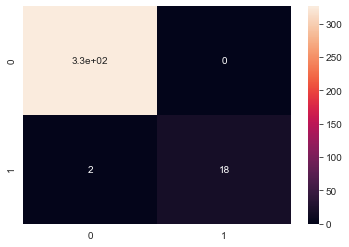




              precision    recall  f1-score   support

           0       0.99      1.00      1.00       326
           1       1.00      0.90      0.95        20

    accuracy                           0.99       346
   macro avg       1.00      0.95      0.97       346
weighted avg       0.99      0.99      0.99       346
 
 ☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼


In [49]:
PLT(knn,x,y,66)

In [51]:
rfc=RandomForestClassifier()
parameters={"n_estimators":range(1,1000,100)}
gk=GridSearchCV(rfc,parameters,cv=5,scoring="accuracy")
gk.fit(x,y)
gk.best_params_

{'n_estimators': 901}

In [52]:
rfc=RandomForestClassifier(n_estimators=901)
max_acc(rfc,x,y)

max accuracy_ score coressponding to ♣♣→ 65 is♣♣ 100.0


In [53]:
k(rfc,x,y)

mean accuracy score for  RandomForestClassifier(n_estimators=901) 0.9050749769623859
Standard deviation  in accuracy score for  RandomForestClassifier(n_estimators=901) 0.0369082239268745

******************************************************
After seen the cross validation score of RandomForestClassifier(n_estimators=901) the accuracy score mean is 0.9050749769623859


100.0




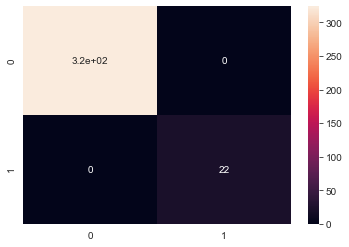




              precision    recall  f1-score   support

           0       1.00      1.00      1.00       324
           1       1.00      1.00      1.00        22

    accuracy                           1.00       346
   macro avg       1.00      1.00      1.00       346
weighted avg       1.00      1.00      1.00       346
 
 ☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼


In [56]:
PLT(rfc,x,y,65)

In [57]:
dct=DecisionTreeClassifier()
max_acc(dct,x,y)

max accuracy_ score coressponding to ♣♣→ 60 is♣♣ 100.0


In [58]:
k(dct,x,y)

mean accuracy score for  DecisionTreeClassifier() 0.8946787299991623
Standard deviation  in accuracy score for  DecisionTreeClassifier() 0.05861917474346031

******************************************************
After seen the cross validation score of DecisionTreeClassifier() the accuracy score mean is 0.8946787299991623


100.0




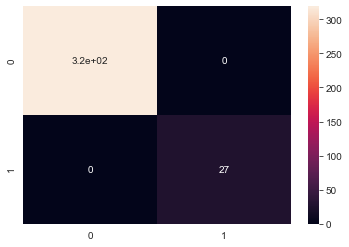




              precision    recall  f1-score   support

           0       1.00      1.00      1.00       319
           1       1.00      1.00      1.00        27

    accuracy                           1.00       346
   macro avg       1.00      1.00      1.00       346
weighted avg       1.00      1.00      1.00       346
 
 ☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼


In [60]:
PLT(dct,x,y,60)

In [62]:
#After seen above results am going with RandomForestClassifier its performing well in this dataset.
#with the random state of 65
rfc=RandomForestClassifier(n_estimators=901)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=65,test_size=0.20)
rfc.fit(x_train,y_train)
y_prd=rfc.predict(x_test)
acc=accuracy_score(y_test,y_prd)
print("accuracy_score",acc*100)
print()
print()
print("CONFUSION_MATRIX OF KNeighborsClassifier  →","\n",confusion_matrix(y_test,y_prd))
print()
print("classification_reportOF KNeighborsClassifier"  ,"\n",
      classification_report(y_test,y_prd))

accuracy_score 100.0


CONFUSION_MATRIX OF KNeighborsClassifier  → 
 [[324   0]
 [  0  22]]

classification_reportOF KNeighborsClassifier 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       324
           1       1.00      1.00      1.00        22

    accuracy                           1.00       346
   macro avg       1.00      1.00      1.00       346
weighted avg       1.00      1.00      1.00       346



In [63]:
import joblib #importing the job
  
# Save the model as a pickle in a file 
joblib.dump(rfc,'car_evalution.pkl')

['car_evalution.pkl']

In [64]:
#saving the predict as csv
joblib.dump(rfc,'Car_evaluation.csv')

['Car_evaluation.csv']

In [65]:
#lets call the model and predict it
Model=joblib.load('Car_evaluation.csv')
Model.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,